# Ames House pricing Prediction
  
In this project, I created a regression model based on the Ames Housing Dataset. This model will predict the price of a house at sale.


# 1. Define problem
### Target:

House price in Ames, IA (sale_price is a continuous variable) 

### Problem Type:

Regression & Predictions

### My Workflow:

- Inferences: Get knowledge of the most important price-related features of the property that people care about when buying a house in Ames, IA
- Predictions: Predict the price of house at sale in Ames, IA based on the important features of the property

# 2. Gather Data
Load the Ames Iowa Housing dataset

In [1]:
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
# load the data
df = pd.read_csv("train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

# 3. Explore & Clean Data
1. Check null values
2. Check data type for each columns
3. Split features and target
3. Get dummy variables for categorical features (for training / testing / predicting dataset together)
4. Training / Testing dataset splitting

In [3]:
df.isnull().sum().sort_values(ascending=False)

Pool QC            2042
Misc Feature       1986
Alley              1911
Fence              1651
Fireplace Qu       1000
Lot Frontage        330
Garage Finish       114
Garage Cond         114
Garage Qual         114
Garage Yr Blt       114
Garage Type         113
Bsmt Exposure        58
BsmtFin Type 2       56
BsmtFin Type 1       55
Bsmt Cond            55
Bsmt Qual            55
Mas Vnr Type         22
Mas Vnr Area         22
Bsmt Half Bath        2
Bsmt Full Bath        2
Garage Cars           1
Garage Area           1
Bsmt Unf SF           1
BsmtFin SF 2          1
Total Bsmt SF         1
BsmtFin SF 1          1
Overall Cond          0
Exterior 2nd          0
Exterior 1st          0
Roof Matl             0
                   ... 
Heating               0
Exter Cond            0
TotRms AbvGrd         0
Yr Sold               0
Mo Sold               0
Misc Val              0
Pool Area             0
Screen Porch          0
3Ssn Porch            0
Enclosed Porch        0
Open Porch SF   

In [4]:
# Based on my investigation about the "null" values, the null values in numeric columns should be 0,
# The null values in categorical columns are the same as "None" or "doesn't have", which we can also use "0" to replace
df.fillna(value=0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       2051 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              2051 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         2

In [5]:
df.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,57.944417,10065.208191,6.112140,5.562165,1971.708922,1984.190151,98.626524,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,33.137332,6742.488909,1.426271,1.104497,30.177889,21.036250,174.324690,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,43.500000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,63.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,78.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,159.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [6]:
# rename df columns
df.columns = [x.lower().replace(' ','_') for x in df.columns] 
df.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,0.0,13517,Pave,0,IR1,Lvl,...,0,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,0,IR1,Lvl,...,0,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,0,Reg,Lvl,...,0,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,0,Reg,Lvl,...,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,0,IR1,Lvl,...,0,0,0,0,0,0,3,2010,WD,138500


In [7]:
# slice X as features and y as target
target = 'saleprice'
features = [x for x in df.columns if x != target]
X = df[features]
y = df[target]
X.shape

(2051, 80)

In [8]:
X.tail()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
2046,1587,921126030,20,RL,79.0,11449,Pave,0,IR1,HLS,...,0,0,0,0,0,0,0,1,2008,WD
2047,785,905377130,30,RL,0.0,12342,Pave,0,IR1,Lvl,...,0,0,0,0,0,0,0,3,2009,WD
2048,916,909253010,50,RL,57.0,7558,Pave,0,Reg,Bnk,...,0,0,0,0,0,0,0,3,2009,WD
2049,639,535179160,20,RL,80.0,10400,Pave,0,Reg,Lvl,...,0,0,0,0,0,0,0,11,2009,WD
2050,10,527162130,60,RL,60.0,7500,Pave,0,Reg,Lvl,...,0,0,0,0,0,0,0,6,2010,WD


In [9]:
# load the predicting dataset in for dummy creation
predict = pd.read_csv("test.csv")

# clean up predicting dataset a little bit
predict.columns = [x.lower().replace(' ','_') for x in predict.columns]
predict.fillna(value=0,inplace=True)
predict.shape

(879, 80)

In [10]:
# concat training and predicting data together and get dummy variables
total = pd.concat([X,predict],axis=0)
total = pd.get_dummies(total,drop_first=True)
total.shape

(2930, 274)

In [11]:
# split training and predicting dataset to different dataframe
X = total.iloc[:len(X),:]
predict = total.iloc[len(X):,:]
X.shape, predict.shape

((2051, 274), (879, 274))

In [12]:
X.tail()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,...,misc_feature_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD
2046,1587,921126030,20,79.0,11449,8,5,2007,2007,0.0,...,0,0,0,0,0,0,0,0,0,1
2047,785,905377130,30,0.0,12342,4,5,1940,1950,0.0,...,0,0,0,0,0,0,0,0,0,1
2048,916,909253010,50,57.0,7558,6,6,1928,1950,0.0,...,0,0,0,0,0,0,0,0,0,1
2049,639,535179160,20,80.0,10400,4,5,1956,1956,0.0,...,0,0,0,0,0,0,0,0,0,1
2050,10,527162130,60,60.0,7500,7,5,1999,1999,0.0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
# training / testing data set spliting
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,shuffle=True)

# 4. Feature Engineering on Training Dataset
1. Manually drop "id, pid" columns 
2. Get polynomial features
3. Standardize the features
4. Decide to use Lasso regression model to help feature selections by eliminating the number of features
2. After get the"important features", save the feature names for further modeling

In [14]:
# drop ids which won't be a good predictor
X_train.drop(['id','pid'],axis=1,inplace=True)

/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [15]:
# creat PolynomialFeatures for training data
poly = PolynomialFeatures(include_bias=False,degree=2)
X_train_poly = poly.fit_transform(X_train)
X_train_poly.shape

(1538, 37400)

In [16]:
X_train_poly_df=pd.DataFrame(X_train_poly,columns=poly.get_feature_names(X_train.columns))
X_train_poly_df.head()

,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,...,sale_type_New^2,sale_type_New sale_type_Oth,sale_type_New sale_type_VWD,sale_type_New sale_type_WD,sale_type_Oth^2,sale_type_Oth sale_type_VWD,sale_type_Oth sale_type_WD,sale_type_VWD^2,sale_type_VWD sale_type_WD,sale_type_WD ^2
0,20.0,85.0,10667.0,6.0,6.0,1971.0,1971.0,302.0,838.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,70.0,107.0,12888.0,7.0,8.0,1937.0,1980.0,0.0,288.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,20.0,60.0,7200.0,5.0,8.0,1950.0,2002.0,0.0,398.0,149.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,60.0,80.0,14000.0,7.0,5.0,1996.0,1997.0,0.0,1201.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,60.0,0.0,11929.0,8.0,7.0,1995.0,1995.0,466.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
# standarize the features
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train_poly)
X_train_scaled.shape

(1538, 37400)

In [18]:
X_train_scaled_df=pd.DataFrame(X_train_scaled,columns=poly.get_feature_names(X_train.columns))
X_train_scaled_df.head()

,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,...,sale_type_New^2,sale_type_New sale_type_Oth,sale_type_New sale_type_VWD,sale_type_New sale_type_WD,sale_type_Oth^2,sale_type_Oth sale_type_VWD,sale_type_Oth sale_type_WD,sale_type_VWD^2,sale_type_VWD sale_type_WD,sale_type_WD ^2
0,-0.856027,0.798505,0.131102,-0.076947,0.400164,-0.028539,-0.629478,1.159913,0.840886,-0.283011,...,-0.285614,0.0,0.0,0.0,-0.044209,0.0,0.0,0.0,0.0,0.388841
1,0.301295,1.448310,0.540450,0.623315,2.218337,-1.155710,-0.199259,-0.558774,-0.331752,-0.283011,...,-0.285614,0.0,0.0,0.0,-0.044209,0.0,0.0,0.0,0.0,0.388841
2,-0.856027,0.060091,-0.507892,-0.777209,2.218337,-0.724733,0.852389,-0.558774,-0.097224,0.593720,...,-0.285614,0.0,0.0,0.0,-0.044209,0.0,0.0,0.0,0.0,0.388841
3,0.069831,0.650822,0.745400,0.623315,-0.508923,0.800262,0.613378,-0.558774,1.614827,-0.283011,...,-0.285614,0.0,0.0,0.0,-0.044209,0.0,0.0,0.0,0.0,0.388841
4,0.069831,-1.712103,0.363699,1.323577,1.309251,0.767110,0.517774,2.093240,-0.945787,-0.283011,...,-0.285614,0.0,0.0,0.0,-0.044209,0.0,0.0,0.0,0.0,0.388841


In [19]:
# Because there are too many predictors, trying to build a Lasso regression model and select the right features
# Find an optimal value for lasso regression alpha using LassoCV
lasso_model = LassoCV(n_alphas=100)
lasso_model = lasso_model.fit(X_train_scaled, y_train)
lasso_optimal_alpha = lasso_model.alpha_
lasso_optimal_alpha

812.0487670259105

In [20]:
# build a lasso model using the optimal alpha, check the cross-validation score
lasso_model = Lasso(alpha=lasso_optimal_alpha)
cross_val_score(lasso_model, X_train_scaled, y_train).mean()

/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.7983608634379319

In [21]:
# fit the model
lasso_model = lasso_model.fit(X_train_scaled, y_train)

In [22]:
# check the lasso coefficients - 368 left
lasso_coef = pd.Series(data=lasso_model.coef_, index=poly.get_feature_names(X_train.columns))
lasso_coef = pd.DataFrame(data=lasso_coef)
lasso_coef.rename(columns={0:'lasso_coef'},inplace=True)
lasso_coef['lasso_coef_abs'] = lasso_coef['lasso_coef'].abs()
lasso_coef.sort_values(by='lasso_coef_abs',ascending=False)
features_picked = lasso_coef[lasso_coef.lasso_coef!=0].index
features_picked

Index(['ms_subclass^2', 'ms_subclass ms_zoning_RM',
       'ms_subclass lot_shape_Reg', 'ms_subclass bsmt_exposure_No',
       'lot_frontage full_bath', 'lot_frontage half_bath',
       'lot_frontage garage_cars', 'lot_frontage exterior_2nd_CmentBd',
       'lot_frontage bsmtfin_type_2_GLQ', 'lot_frontage sale_type_Oth',
       ...
       'bsmtfin_type_1_Unf functional_Maj2',
       'bsmtfin_type_1_Unf sale_type_Oth',
       'bsmtfin_type_2_ALQ fireplace_qu_TA',
       'bsmtfin_type_2_ALQ garage_finish_Fin',
       'bsmtfin_type_2_Unf functional_Maj2',
       'bsmtfin_type_2_Unf garage_type_2Types',
       'kitchen_qual_Gd misc_feature_Othr', 'fireplace_qu_Gd pool_qc_Gd',
       'garage_type_Detchd sale_type_Oth', 'pool_qc_Gd sale_type_New'],
      dtype='object', length=368)

In [23]:
# slice X_train_scaled data to the picked predictors
X_train_scaled_picked = X_train_scaled_df[features_picked]
X_train_scaled_picked.shape

(1538, 368)

# 5. Model with data & Evaluate
### A. Modeling  
1. Use Cross-validation to try Linear / Lasso / Ridge / Elastic Net regression model and see which one perform better on the training dataset
2. Compared the cross-validation results, Ridge is the best, but we still want to test them on the test dataset to make sure they are not overfitting  

### B. Evaluation  
1. Clean up testing dataset - Same process to training dataset
2. Feature engineering on testing dataset - Same process to training dataset
3. Fit the models using training data and use the testing dataset to score each models (Linear / Lasso / Ridge / Elastic Net regression) to see which one has the highest score 
4. Lasso got the highest score on testing dataset (0.93 r2 score), which is pretty good. So I decided to use this model to do prediction

### C. Optimization  
After decision (Lasso regression model), for optimization purpose, I'm building the real model using the entire training + testing dataset I have to make a better model (lasso_model_2)


### A. Modeling

In [24]:
# Try LinearRegression for the picked features, it's so bad
lr = LinearRegression()
lr_model = lr.fit(X_train_scaled_picked,y_train)
cross_val_score(lr_model, X_train_scaled_picked, y_train).mean()

-3.1510322321266766e+22

In [25]:
# Try Lasso Regression
lasso_model_1 = LassoCV(n_alphas=200)
lasso_model_1 = lasso_model_1.fit(X_train_scaled_picked, y_train)
lasso_optimal_alpha_1 = lasso_model_1.alpha_
lasso_optimal_alpha_1

65.86777910394683

In [26]:
lasso_model_1 = Lasso(alpha=lasso_optimal_alpha,max_iter=10000)
cross_val_score(lasso_model_1, X_train_scaled_picked, y_train).mean()

0.8414126748286502

In [27]:
# Try Ridge Regression
r_alphas = np.logspace(0, 5, 200) 
ridge_model = RidgeCV(alphas=r_alphas, store_cv_values=True)
ridge_model = ridge_model.fit(X_train_scaled_picked, y_train)
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

1.0

In [28]:
ridge_opt = Ridge(alpha=ridge_optimal_alpha)
cross_val_score(ridge_opt, X_train_scaled_picked, y_train).mean()

0.9155796608593949

In [29]:
# Try Elastic Net Regression, enet_ratio = 1 is the best (tried few times)
enet_ratio = 1
enet_model = ElasticNetCV(n_alphas=100, l1_ratio=enet_ratio)
enet_model = enet_model.fit(X_train_scaled_picked, y_train)
enet_optimal_alpha = enet_model.alpha_
enet_optimal_alpha

65.86777910394683

In [30]:
enet_model = ElasticNet(alpha=enet_optimal_alpha,l1_ratio=enet_ratio)
cross_val_score(enet_model, X_train_scaled_picked, y_train).mean()

0.8926195740654571

### B. Evaluation

In [31]:
# drop testing data set id and pid which won't be a good predictors
X_test.drop(['id','pid'],axis=1,inplace=True)

/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [32]:
# creat PolynomialFeatures for testing data
X_test_poly = PolynomialFeatures(include_bias=False,degree=2)
X_test_poly = poly.fit_transform(X_test)
X_test_poly.shape

(513, 37400)

In [33]:
# standarize the features
ss = StandardScaler()
X_test_scaled = ss.fit_transform(X_test_poly)
X_test_scaled.shape

(513, 37400)

In [34]:
# slice the X_test_scaled data to only the selected features I picked using Lasso feature selection
X_test_scaled_df=pd.DataFrame(X_test_scaled,columns=poly.get_feature_names(X_test.columns))
X_test_scaled_picked = X_test_scaled_df[features_picked]

In [35]:
# Fit and Score Ridge Regression
ridge_model = ridge_model.fit(X_train_scaled_picked, y_train)
ridge_model.score(X_test_scaled_picked,y_test)

0.9163585368742567

In [36]:
# Fit and Score Elastic Net Regression
enet_model = enet_model.fit(X_train_scaled_picked, y_train)
enet_model.score(X_test_scaled_picked,y_test)

0.9190279024672294

In [37]:
# Fit and Score lasso model on testing data
lasso_model_1 = lasso_model_1.fit(X_train_scaled_picked, y_train)
lasso_model_1.score(X_test_scaled_picked,y_test)

0.9298597791294881

### C. Optimization

In [38]:
X_scaled_picked = pd.concat([X_train_scaled_picked,X_test_scaled_picked])
X_scaled_picked.shape

(2051, 368)

In [39]:
y_total = pd.concat([y_train,y_test])
y_total.shape

(2051,)

In [40]:
# Fit entire dataset and Score lasso test score
X_scaled_picked = pd.concat([X_train_scaled_picked,X_test_scaled_picked])
y_total = pd.concat([y_train,y_test])
lasso_model_2 = lasso_model_1.fit(X_scaled_picked, y_total)
lasso_model_2.score(X_test_scaled_picked,y_test)

0.9515593750856383

# 6. Answer Questions

### Questions:  
1. Get knowledge of the most important elements that people care about when buying a house in Ames, IA
2. Predict the price of house at sale using the Ames Iowa Housing dataset

### Way to Answer:  
1. Check the Coefficients of the model
2. Use the test dataset to predict the sales price of Ames

### Answer:  
![answer](Final_Answer.png)

In [42]:
# check the lasso coefficients
lasso_model_2 = lasso_model_1.fit(X_scaled_picked, y_total)
lasso_coef_2 = pd.Series(data=lasso_model_2.coef_, index=X_train_scaled_picked.columns)
lasso_coef_2 = pd.DataFrame(data=lasso_coef_2)
lasso_coef_2.rename(columns={0:'lasso_coef'},inplace=True)
lasso_coef_2['lasso_coef_abs'] = lasso_coef_2['lasso_coef'].abs()
lasso_coef_2.sort_values(by='lasso_coef_abs',ascending=False)
features_picked_2 = lasso_coef_2[lasso_coef_2.lasso_coef!=0].index

In [43]:
lasso_coef_2.sort_values(by='lasso_coef_abs',ascending=False)

,lasso_coef,lasso_coef_abs
overall_qual gr_liv_area,18645.918614,18645.918614
half_bath pool_qc_Gd,-10982.224945,10982.224945
overall_cond gr_liv_area,9019.628421,9019.628421
overall_qual garage_area,5502.518096,5502.518096
year_built year_remod/add,5431.422073,5431.422073
overall_qual total_bsmt_sf,5170.781396,5170.781396
overall_qual misc_feature_Elev,-3991.974233,3991.974233
overall_cond misc_feature_Elev,-3913.613769,3913.613769
bsmtfin_sf_1 condition_1_Norm,3829.189107,3829.189107
overall_qual fireplaces,3724.080140,3724.080140


Text(0,0.5,'y_test')

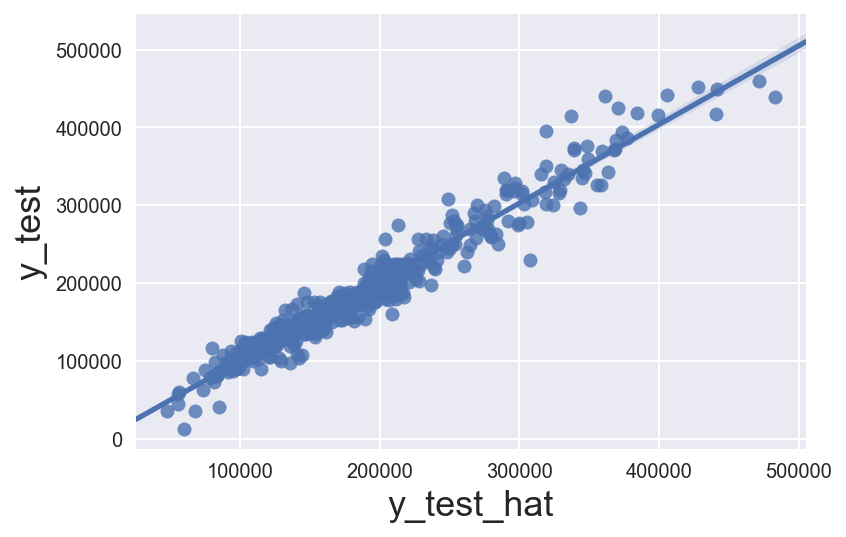

In [44]:
# plot the predictions based on test dataset
y_test_hat = lasso_model_2.predict(X_test_scaled_picked)
sns.regplot(y_test_hat,y_test)
plt.xlabel('y_test_hat',fontsize=18)
plt.ylabel('y_test',fontsize=18)

In [46]:
# 225 out of 368 predictors are left, others are zero out
lasso_coef_2[lasso_coef_2['lasso_coef_abs']!=0].count()

lasso_coef        225
lasso_coef_abs    225
dtype: int64

In [47]:
lasso_coef_2.shape

(368, 2)

In [48]:
# creat PolynomialFeatures for predicting data
poly = PolynomialFeatures(include_bias=False,degree=2)
predict_poly = poly.fit_transform(predict)
predict_poly.shape

(879, 37949)

In [49]:
# standarize the features for predicting data
ss = StandardScaler()
predict_scaled = ss.fit_transform(predict_poly)
predict_scaled.shape

(879, 37949)

In [50]:
predict_scaled_df=pd.DataFrame(predict_scaled,columns=poly.get_feature_names(predict.columns))
predict_scaled_picked = predict_scaled_df[features_picked]
predict_scaled_picked.shape

(879, 368)

In [51]:
# predict y using predicting value
predict['saleprice'] = lasso_model_2.predict(predict_scaled_picked)
predict['saleprice'].shape

/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


(879,)

In [52]:
# slice the id and saleprice columns from test dataset and save it to csv file
result = predict[['id','saleprice']]
result.rename(columns={"id": "Id", "saleprice": "SalePrice"},inplace=True)
result.set_index('Id',drop=True,inplace=True)
result.SalePrice = result.SalePrice.round(4)
result = result.sort_index(ascending=True)
result.to_csv('result.csv')

/anaconda3/envs/dsi/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/anaconda3/envs/dsi/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
